In [ ]:
!pip install pandas numpy scikit-learn statsmodels


In [ ]:
import pandas as pd
import numpy as np

# Generating mock data for one month restaurant sales
np.random.seed(42)

# Assume we have 10 items in the restaurant menu
num_items = 10

# Item IDs and names
item_ids = range(1, num_items + 1)
items = [f'Item_{i}' for i in item_ids]

# Item cost (in INR) as integer values
item_costs = np.random.randint(50, 300, num_items)

# Generating sales data for each day of the week
sales_data = {
    'item_id': item_ids,
    'item': items,
    'food_cost'
    'per_plate_cost': item_costs,
    'sun_sales': np.random.randint(10, 100, num_items),
    'mon_sales': np.random.randint(10, 100, num_items),
    'tue_sales': np.random.randint(10, 100, num_items),
    'wed_sales': np.random.randint(10, 100, num_items),
    'thu_sales': np.random.randint(10, 100, num_items),
    'fri_sales': np.random.randint(10, 100, num_items),
    'sat_sales': np.random.randint(10, 100, num_items),
}

# Calculating total monthly sales for each item
sales_data['_tot_month_sales'] = (
    sales_data['sun_sales'] + sales_data['mon_sales'] + sales_data['tue_sales'] +
    sales_data['wed_sales'] + sales_data['thu_sales'] + sales_data['fri_sales'] +
    sales_data['sat_sales']
)

# Creating DataFrame
df_sales = pd.DataFrame(sales_data)
print(df_sales)


   item_id     item  item_cost  sun_sales  mon_sales  tue_sales  wed_sales  \
0        1   Item_1        152         92         97         31         56   
1        2   Item_2        229         96         39         98         71   
2        3   Item_3        142         84         47         58         60   
3        4   Item_4         64         84         11         68         64   
4        5   Item_5        156         97         73         51         73   
5        6   Item_6        121         33         69         69         12   
6        7   Item_7        238         12         30         89         60   
7        8   Item_8         70         31         42         24         16   
8        9   Item_9        152         62         85         71         30   
9       10  Item_10        171         11         67         71         82   

   thu_sales  fri_sales  sat_sales  _tot_month_sales  
0         48         93         59               476  
1         27         69        

In [ ]:
df_sales.to_csv('monthly_sales_data.csv', index=False)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
data = pd.read_csv('monthly_sales_data.csv')

# Feature engineering
data['average_daily_sales'] = data[['sun_sales', 'mon_sales', 'tue_sales', 'wed_sales', 'thu_sales', 'fri_sales', 'sat_sales']].mean(axis=1)

# Prepare the features and target variable
features = data[['item_cost', 'average_daily_sales']]
target = data['_tot_month_sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}\n')

# Add the predictions to the test set for analysis
X_test['predicted_sales'] = predictions

# Suggest new prices based on the predictions and cost (simplified example)
X_test['suggested_price'] = X_test['predicted_sales'] * 1.2 / X_test['average_daily_sales']

# Ensure prices are rounded appropriately (optional)
X_test['suggested_price'] = np.round(X_test['suggested_price'], 2)

# Output the suggested prices
print(X_test[['item_cost', 'average_daily_sales', 'predicted_sales', 'suggested_price']])


Mean Squared Error: 238.44544999999937

   item_cost  average_daily_sales  predicted_sales  suggested_price
8        152                 61.0           435.70             8.57
1        229                 59.0           392.97             7.99


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Generating mock data for one month restaurant sales
np.random.seed(42)

# Assume we have 10 items in the restaurant menu
num_items = 10

# Item IDs and names
item_ids = range(1, num_items + 1)
items = [f'Item_{i}' for i in item_ids]

# Item cost (in INR) as integer values
item_costs = np.random.randint(50, 300, num_items)

# Generating sales data for each day of the week
sales_data = {
    'item_id': item_ids,
    'item': items,
    'item_cost': item_costs,
    'sun_sales': np.random.randint(10, 100, num_items),
    'mon_sales': np.random.randint(10, 100, num_items),
    'tue_sales': np.random.randint(10, 100, num_items),
    'wed_sales': np.random.randint(10, 100, num_items),
    'thu_sales': np.random.randint(10, 100, num_items),
    'fri_sales': np.random.randint(10, 100, num_items),
    'sat_sales': np.random.randint(10, 100, num_items),
}

# Calculating total monthly sales for each item
sales_data['_tot_month_sales'] = (
    sales_data['sun_sales'] + sales_data['mon_sales'] + sales_data['tue_sales'] +
    sales_data['wed_sales'] + sales_data['thu_sales'] + sales_data['fri_sales'] +
    sales_data['sat_sales']
)

# Creating DataFrame
df_sales = pd.DataFrame(sales_data)
print(df_sales)

# Save the DataFrame to a CSV file
df_sales.to_csv('monthly_sales_data.csv', index=False)

# Feature engineering
df_sales['average_daily_sales'] = df_sales[['sun_sales', 'mon_sales', 'tue_sales', 'wed_sales', 'thu_sales', 'fri_sales', 'sat_sales']].mean(axis=1)

# Prepare the features and target variable
features = df_sales[['item_cost', 'average_daily_sales']]
target = df_sales['_tot_month_sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Add the predictions to the test set for analysis
X_test['predicted_sales'] = predictions

# Suggest new prices based on the predictions and cost (simplified example)
X_test['suggested_price'] = X_test['predicted_sales'] * 1.2 / X_test['average_daily_sales']

# Ensure prices are rounded appropriately (optional)
X_test['suggested_price'] = np.round(X_test['suggested_price'], 2)

# Output the suggested prices
print(X_test[['item_cost', 'average_daily_sales', 'predicted_sales', 'suggested_price']])


   item_id     item  item_cost  sun_sales  mon_sales  tue_sales  wed_sales  \
0        1   Item_1        152         92         97         31         56   
1        2   Item_2        229         96         39         98         71   
2        3   Item_3        142         84         47         58         60   
3        4   Item_4         64         84         11         68         64   
4        5   Item_5        156         97         73         51         73   
5        6   Item_6        121         33         69         69         12   
6        7   Item_7        238         12         30         89         60   
7        8   Item_8         70         31         42         24         16   
8        9   Item_9        152         62         85         71         30   
9       10  Item_10        171         11         67         71         82   

   thu_sales  fri_sales  sat_sales  _tot_month_sales  
0         48         93         59               476  
1         27         69        

In [ ]:
# Load the sales data
df_sales = pd.read_csv('monthly_sales_data.csv')

# Define restaurant financial details
labor_costs = 20000  # in INR
monthly_overheads = 12000  # in INR
profit_goal = 20000  # in INR
total_sales = 50000  # in INR

# Calculate the Ideal Food Cost Percentage (MFC)
mfc = 100 - ((labor_costs + monthly_overheads + profit_goal) / total_sales * 100)

# Calculate Gross Profit Margin
ideal_gross_profit_margin = 0.40  # 40%

# Function to calculate menu price based on Ideal Food Cost Percentage
def calculate_ideal_price(food_cost, mfc):
    ideal_price = food_cost / (mfc / 100)
    return ideal_price

# Function to calculate menu price based on Gross Profit Margin
def calculate_gross_profit_price(food_cost, gross_profit_margin):
    price = food_cost / (1 - gross_profit_margin)
    return price

# Assuming we have plate costs (raw food costs) for each item
# Here, we'll generate mock plate costs for simplicity
np.random.seed(42)
df_sales['plate_cost'] = df_sales['item_cost']

# Calculate suggested prices using both methods
df_sales['suggested_price_mfc'] = df_sales['plate_cost'].apply(calculate_ideal_price, args=(mfc,))
df_sales['suggested_price_gpm'] = df_sales['plate_cost'].apply(calculate_gross_profit_price, args=(ideal_gross_profit_margin,))

# Display the results
print(df_sales[['item', 'plate_cost', 'suggested_price_mfc', 'suggested_price_gpm']])


      item  plate_cost  suggested_price_mfc  suggested_price_gpm
0   Item_1         152              -3800.0           253.333333
1   Item_2         229              -5725.0           381.666667
2   Item_3         142              -3550.0           236.666667
3   Item_4          64              -1600.0           106.666667
4   Item_5         156              -3900.0           260.000000
5   Item_6         121              -3025.0           201.666667
6   Item_7         238              -5950.0           396.666667
7   Item_8          70              -1750.0           116.666667
8   Item_9         152              -3800.0           253.333333
9  Item_10         171              -4275.0           285.000000


generate restuarant following datasets(they are realted to one another, make sure of IDs):- 1.menu_items with columns- item_id, item, cost_of_preparation(round off price), cost_per_plate(charming price such as 39,59,89..),.csv: idli, vada, masala dosa, set dosa, plain dosa, butter dosa, roti curry, puri, rice-bath, rice-dal, curd rice, tea, ginger tea, black tea, lemon tea, coffee, americano, cappuccino, milk, lime juice, lime soda, pani uri, bhel puri, sev puri, samosa, kachori.   

2.sales.csv: item_id, sun_sales, mon_sales, tue_sales, wed_sales, thu_sales, fri_sales, sat_sales, tot_monthly_sales(let there be higher sales on sunday, mon, fri, sat comparitively)                        

3. avg_sales: item_id, avg_sun_sales, avg_mon_sales, avg_tue_sales, avg_wed_sales, avg_thu_sales, avg_fri_sales, avg_sat_sales, avg_monthly_sales      

4.timely_sales: item_id, morning_sales, afternoon_sales, evening_sales, night_sales(In mornings, let sales of idli,vada,masala dosa, butter dosa,puri, tea,cofee be higher than other items. In afternoons its ricebath, roto currry, rice-dal, curd rice,lime juice, lime soda. In evenings, tea, cofee, ginger tea, capichino, pani puri, sev puri, bhel puri, samosa, kachori. In nights, Roti curry,rice-dal)

In [ ]:
import pandas as pd
import numpy as np

# Generate menu_items.csv
menu_items = {
    'item_id': list(range(1, 27)),
    'item': ['idli', 'vada', 'masala dosa', 'set dosa', 'plain dosa', 'butter dosa', 'roti curry', 'puri',
             'rice-bath', 'rice-dal', 'curd rice', 'tea', 'ginger tea', 'black tea', 'lemon tea', 'coffee',
             'americano', 'cappuccino', 'milk', 'lime juice', 'lime soda', 'pani puri', 'bhel puri', 'sev puri',
             'samosa', 'kachori'],
    'cost_of_preparation': [10, 12, 20, 18, 15, 22, 25, 20, 30, 25, 20, 5, 6, 4, 7, 8, 10, 12, 6, 5, 7, 15, 15, 15, 10, 12],
    'cost_per_plate': [39, 39, 59, 59, 39, 59, 89, 49, 79, 69, 49, 19, 19, 19, 19, 29, 49, 49, 19, 19, 19, 39, 39, 39, 29, 29]
}

menu_items_df = pd.DataFrame(menu_items)
menu_items_df.to_csv('menu_items.csv', index=False)

# Generate sales.csv
np.random.seed(0)  # For reproducibility

def generate_sales(mean, std, factor=1.5):
    return np.random.randint(mean - std, mean + std) * factor

sales = {
    'item_id': list(range(1, 27)),
    'sun_sales': [generate_sales(100, 30) for _ in range(26)],
    'mon_sales': [generate_sales(80, 25) for _ in range(26)],
    'tue_sales': [generate_sales(60, 20) for _ in range(26)],
    'wed_sales': [generate_sales(50, 20) for _ in range(26)],
    'thu_sales': [generate_sales(55, 20) for _ in range(26)],
    'fri_sales': [generate_sales(90, 25) for _ in range(26)],
    'sat_sales': [generate_sales(110, 30) for _ in range(26)],
}
sales['tot_monthly_sales'] = [sum(sales[key][i] for key in sales if key != 'item_id') for i in range(26)]

sales_df = pd.DataFrame(sales)
sales_df = sales_df.astype(int)
sales_df.to_csv('sales.csv', index=False)

# Generate avg_sales.csv
avg_sales = {
    'item_id': list(range(1, 27)),
    'avg_sun_sales': sales_df['sun_sales'] / 4,
    'avg_mon_sales': sales_df['mon_sales'] / 4,
    'avg_tue_sales': sales_df['tue_sales'] / 4,
    'avg_wed_sales': sales_df['wed_sales'] / 4,
    'avg_thu_sales': sales_df['thu_sales'] / 4,
    'avg_fri_sales': sales_df['fri_sales'] / 4,
    'avg_sat_sales': sales_df['sat_sales'] / 4,
    'avg_monthly_sales': sales_df['tot_monthly_sales'] / 4
}
avg_sales_df = pd.DataFrame(avg_sales)
avg_sales_df = avg_sales_df.astype(int)
avg_sales_df.to_csv('avg_sales.csv', index=False)

# Generate timely_sales.csv
timely_sales = {
    'item_id': list(range(1, 27)),
    'morning_sales': [np.random.randint(60, 100) if item in ['idli', 'vada', 'masala dosa', 'butter dosa', 'puri', 'tea', 'coffee'] else np.random.randint(10, 20) for item in menu_items['item']],
    'afternoon_sales': [np.random.randint(60, 100) if item in ['rice-bath', 'roti curry', 'rice-dal', 'curd rice', 'lime juice', 'lime soda'] else np.random.randint(10, 20) for item in menu_items['item']],
    'evening_sales': [np.random.randint(60, 100) if item in ['tea', 'coffee', 'ginger tea', 'cappuccino', 'pani puri', 'sev puri', 'bhel puri', 'samosa', 'kachori'] else np.random.randint(10, 20) for item in menu_items['item']],
    'night_sales': [np.random.randint(60, 100) if item in ['roti curry', 'rice-dal'] else np.random.randint(10, 20) for item in menu_items['item']]
}

timely_sales_df = pd.DataFrame(timely_sales)
timely_sales_df = timely_sales_df.astype(int)
timely_sales_df.to_csv('timely_sales.csv', index=False)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


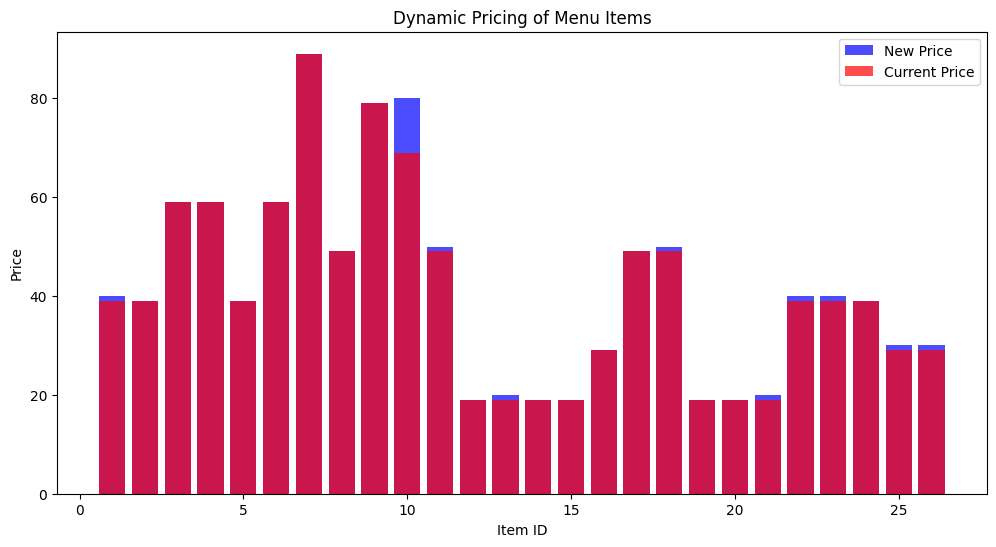

    item_id  current_price  new_price
0         1             39       40.0
1         2             39       39.0
2         3             59       59.0
3         4             59       59.0
4         5             39       39.0
5         6             59       59.0
6         7             89       89.0
7         8             49       49.0
8         9             79       79.0
9        10             69       80.0
10       11             49       50.0
11       12             19       19.0
12       13             19       20.0
13       14             19       19.0
14       15             19       19.0
15       16             29       29.0
16       17             49       49.0
17       18             49       50.0
18       19             19       19.0
19       20             19       19.0
20       21             19       20.0
21       22             39       40.0
22       23             39       40.0
23       24             39       39.0
24       25             29       30.0
25       26 

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Load the datasets
menu_items_df = pd.read_csv('menu_items.csv')
sales_df = pd.read_csv('sales.csv')

# Function to perform sales prediction using SARIMA
def predict_sales(item_sales):
    model = SARIMAX(item_sales, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
    result = model.fit(disp=False)
    forecast = result.get_forecast(steps=4)
    return forecast.predicted_mean

# Prepare a dictionary to store predictions
predictions = {}

# Iterate over each item and predict the sales for the next 4 weeks (1 month)
for item_id in sales_df['item_id']:
    item_sales = sales_df[sales_df['item_id'] == item_id].iloc[:, 1:8].values.flatten()
    predictions[item_id] = predict_sales(item_sales)

# Adjust prices based on predicted sales
dynamic_prices = []

for item_id, forecast in predictions.items():
    current_price = menu_items_df.loc[menu_items_df['item_id'] == item_id, 'cost_per_plate'].values[0]
    predicted_sales = forecast.mean()

    # Dynamic pricing logic
    if predicted_sales > 200:
        new_price = round(current_price * 1.1, -1)  # Increase price by 10% and round to nearest 10
    elif predicted_sales < 100:
        new_price = round(current_price * 0.9, -1)  # Decrease price by 10% and round to nearest 10
    else:
        new_price = current_price

    dynamic_prices.append((item_id, current_price, new_price))

# Create a DataFrame for dynamic prices
dynamic_prices_df = pd.DataFrame(dynamic_prices, columns=['item_id', 'current_price', 'new_price'])

# Save the dynamic prices to a CSV
dynamic_prices_df.to_csv('dynamic_prices.csv', index=False)

# Visualize the price changes
plt.figure(figsize=(12, 6))
plt.bar(dynamic_prices_df['item_id'], dynamic_prices_df['new_price'], color='blue', alpha=0.7, label='New Price')
plt.bar(dynamic_prices_df['item_id'], dynamic_prices_df['current_price'], color='red', alpha=0.7, label='Current Price')
plt.xlabel('Item ID')
plt.ylabel('Price')
plt.title('Dynamic Pricing of Menu Items')
plt.legend()
plt.show()

print(dynamic_prices_df)


In [ ]:
import pandas as pd
import numpy as np

# Load the sales data
df_sales = pd.read_csv('monthly_sales_data.csv')

# Define restaurant financial details
labor_costs = 17000  # in INR
monthly_overheads = 11000  # in INR
profit_goal = 9000  # in INR
total_sales = 55000  # in INR

# Calculate the Ideal Food Cost Percentage (MFC)
mfc = 100 - ((labor_costs + monthly_overheads + profit_goal) / total_sales * 100)

# Calculate Gross Profit Margin
ideal_gross_profit_margin = 0.40  # 40%

# Function to calculate menu price based on Ideal Food Cost Percentage
def calculate_ideal_price(food_cost, mfc):
    ideal_price = food_cost / (mfc / 100)
    return ideal_price

# Function to calculate menu price based on Gross Profit Margin
def calculate_gross_profit_price(food_cost, gross_profit_margin):
    price = food_cost / (1 - gross_profit_margin)
    return price

# Assuming we have plate costs (raw food costs) for each item
# Here, we'll generate mock plate costs for simplicity
np.random.seed(42)
df_sales['plate_cost'] = np.random.uniform(50, 200, len(df_sales))

# Calculate suggested prices using both methods
df_sales['suggested_price_mfc'] = df_sales['plate_cost'].apply(calculate_ideal_price, args=(mfc,))
df_sales['suggested_price_gpm'] = df_sales['plate_cost'].apply(calculate_gross_profit_price, args=(ideal_gross_profit_margin,))

# Example tax adjustment factor
tax_rate = 0.18  # 18% GST

# Adjusting final price by including tax
df_sales['final_price_mfc'] = df_sales['suggested_price_mfc'] * (1 + tax_rate)
df_sales['final_price_gpm'] = df_sales['suggested_price_gpm'] * (1 + tax_rate)

# Display the results
print(df_sales[['item', 'plate_cost', 'suggested_price_mfc', 'final_price_mfc', 'suggested_price_gpm', 'final_price_gpm']])


      item  plate_cost  suggested_price_mfc  final_price_mfc  \
0   Item_1  106.181018           324.441999       382.841559   
1   Item_2  192.607146           588.521835       694.455765   
2   Item_3  159.799091           488.275001       576.164501   
3   Item_4  139.798773           427.162916       504.052241   
4   Item_5   73.402796           224.286321       264.657859   
5   Item_6   73.399178           224.275266       264.644814   
6   Item_7   58.712542           179.399433       211.691331   
7   Item_8  179.926422           549.775178       648.734710   
8   Item_9  140.167252           428.288825       505.380813   
9  Item_10  156.210887           477.311043       563.227030   

   suggested_price_gpm  final_price_gpm  
0           176.968363       208.822668  
1           321.011910       378.794054  
2           266.331819       314.271546  
3           232.997954       274.937586  
4           122.337993       144.358832  
5           122.331963       144.351717  
6

In [ ]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
num_items = 50  # Number of items in the menu
num_days = 30  # Number of days in the dataset (one month)

# Generate item IDs and names
item_ids = range(1, num_items + 1)
items = [f'Item_{i}' for i in item_ids]

# Generate item costs (in INR) as integer values
item_costs = np.random.randint(50, 300, num_items)

# Generate daily sales data for each item
sales_data = {
    'item_id': item_ids,
    'item': items,
    'item_cost': item_costs
}

# Add daily sales columns
for day in range(1, num_days + 1):
    sales_data[f'day_{day}_sales'] = np.random.randint(0, 100, num_items)

# Create a DataFrame
df_sales = pd.DataFrame(sales_data)

# Calculate total monthly sales for each item
df_sales['_tot_month_sales'] = df_sales[[f'day_{day}_sales' for day in range(1, num_days + 1)]].sum(axis=1)

# Calculate average daily sales for each item and convert to integer
df_sales['_avg_daily_sales'] = (df_sales['_tot_month_sales'] / num_days).astype(int)

# Save the DataFrame to a CSV file
df_sales.to_csv('robust_monthly_sales_data.csv', index=False)

print("Dataset generated and saved as 'robust_monthly_sales_data.csv'")
print(df_sales.head())


Dataset generated and saved as 'robust_monthly_sales_data.csv'
   item_id    item  item_cost  day_1_sales  day_2_sales  day_3_sales  \
0        1  Item_1        152           54           86           98   
1        2  Item_2        229           63           61           46   
2        3  Item_3        142            2           39           77   
3        4  Item_4         64           50           84            2   
4        5  Item_5        156            6           79            0   

   day_4_sales  day_5_sales  day_6_sales  day_7_sales  ...  day_23_sales  \
0            0           55           11           21  ...            13   
1           26           16           68           29  ...            31   
2           61           37           36           37  ...            50   
3           76           23           31           50  ...            37   
4            2           68            8           53  ...            96   

   day_24_sales  day_25_sales  day_26_sales  da

In [ ]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
num_items = 50  # Number of items in the menu
num_days = 30  # Number of days in the dataset (one month)

# Generate item IDs and names
item_ids = range(1, num_items + 1)
items = [f'Item_{i}' for i in item_ids]

# Generate item costs (in INR) as integer values
item_costs = np.random.randint(50, 300, num_items)

# Generate daily sales data for each item
sales_data = {
    'item_id': item_ids,
    'item': items,
    'item_cost': item_costs
}

# Add daily sales columns
for day in range(1, num_days + 1):
    sales_data[f'day_{day}_sales'] = np.random.randint(0, 100, num_items)

# Create a DataFrame
df_sales = pd.DataFrame(sales_data)

# Calculate total monthly sales for each item
df_sales['_tot_month_sales'] = df_sales[[f'day_{day}_sales' for day in range(1, num_days + 1)]].sum(axis=1)

# Calculate average daily sales for each item and convert to integer
df_sales['_avg_daily_sales'] = (df_sales['_tot_month_sales'] / num_days).astype(int)

# Save the DataFrame to a CSV file
df_sales.to_csv('robust_monthly_sales_data.csv', index=False)

print("Dataset generated and saved as 'robust_monthly_sales_data.csv'")
print(df_sales.head())


Dataset generated and saved as 'robust_monthly_sales_data.csv'
   item_id    item  item_cost  day_1_sales  day_2_sales  day_3_sales  \
0        1  Item_1        152           54           86           98   
1        2  Item_2        229           63           61           46   
2        3  Item_3        142            2           39           77   
3        4  Item_4         64           50           84            2   
4        5  Item_5        156            6           79            0   

   day_4_sales  day_5_sales  day_6_sales  day_7_sales  ...  day_23_sales  \
0            0           55           11           21  ...            13   
1           26           16           68           29  ...            31   
2           61           37           36           37  ...            50   
3           76           23           31           50  ...            37   
4            2           68            8           53  ...            96   

   day_24_sales  day_25_sales  day_26_sales  da

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
df_sales = pd.read_csv('monthly_food_sales.csv')

# Feature Engineering
#df_sales['average_daily_sales'] = df_sales['_tot_month_sales'] / 30

# Define features and target
X = df_sales[['item_cost', 'avg_daily_sales']]
y = df_sales['_tot_month_sales']

# Train Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin = lin_reg.predict(X)
mse_lin = mean_squared_error(y, y_pred_lin)

# Train Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X, y)
y_pred_rf = rf_reg.predict(X)
mse_rf = mean_squared_error(y, y_pred_rf)

# Calculate suggested prices based on ideal food cost percentage (e.g., 33%)
ideal_food_cost_percentage = 0.33
df_sales['suggested_price'] = df_sales['item_cost'] / ideal_food_cost_percentage

# Output the results
print(f"Linear Regression MSE: {mse_lin}")
print(f"Random Forest Regression MSE: {mse_rf}")
print(df_sales[['item', 'item_cost', 'avg_daily_sales', '_tot_month_sales', 'suggested_price']])


Linear Regression MSE: 60.89850912565054
Random Forest Regression MSE: 175.2839479999998
       item  item_cost  _avg_daily_sales  _tot_month_sales  suggested_price
0    Item_1        152                55              1662       460.606061
1    Item_2        229                42              1260       693.939394
2    Item_3        142                49              1484       430.303030
3    Item_4         64                45              1379       193.939394
4    Item_5        156                45              1373       472.727273
5    Item_6        121                48              1458       366.666667
6    Item_7        238                45              1364       721.212121
7    Item_8         70                46              1394       212.121212
8    Item_9        152                49              1493       460.606061
9   Item_10        171                39              1191       518.181818
10  Item_11        260                46              1403       787.878788